## Predicting number of bikes needed per hour

### Awadh Ahmed

###### Predicting number of bikes need on average with regression techniques using a dataset that contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall)

In [1]:
# importing our libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
# importing our dataset and changing our index to the date
# df.head() as a sanity check

df = pd.read_csv("DataSet - Seoul Bike Rental.csv", encoding= 'unicode_escape')

df.index = pd.to_datetime(df['Date'])
df = df.drop(['Date'], axis = 1)

df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
Date,,,,,,,,,,,,,
2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [3]:
# Checking the data types of our variables as well as if any null values exist

display(df.dtypes)
display(df.isna().any())

Rented Bike Count              int64
Hour                           int64
Temperature(°C)              float64
Humidity(%)                    int64
Wind speed (m/s)             float64
Visibility (10m)               int64
Dew point temperature(°C)    float64
Solar Radiation (MJ/m2)      float64
Rainfall(mm)                 float64
Snowfall (cm)                float64
Seasons                       object
Holiday                       object
Functioning Day               object
dtype: object

Rented Bike Count            False
Hour                         False
Temperature(°C)              False
Humidity(%)                  False
Wind speed (m/s)             False
Visibility (10m)             False
Dew point temperature(°C)    False
Solar Radiation (MJ/m2)      False
Rainfall(mm)                 False
Snowfall (cm)                False
Seasons                      False
Holiday                      False
Functioning Day              False
dtype: bool

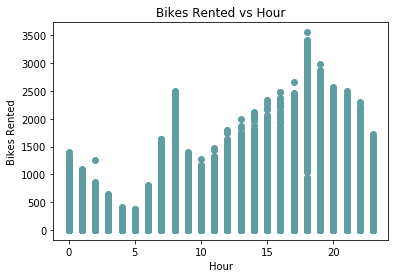

In [4]:
# Plot looking at bike rentals every hour

x = df['Hour']
y = df['Rented Bike Count']

plt.plot(x, y, 'o', color ='cadetblue')
plt.title("Bikes Rented vs Hour")
plt.xlabel("Hour")
plt.ylabel("Bikes Rented")

plt.show()

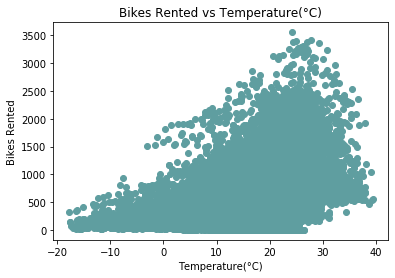

In [5]:
# Scatter plot looking at Bike Rentals by temperature

x = df['Temperature(°C)']
y = df['Rented Bike Count']

plt.plot(x, y, 'o', color ='cadetblue')
plt.title("Bikes Rented vs Temperature(°C)")
plt.xlabel("Temperature(°C)")
plt.ylabel("Bikes Rented")

plt.show()

In [6]:
# Correlation table that looks at the correlation of our variables to one another
# Bikes rented has some correlation with temperature and a marginal correlation with hours/day & Dew point
# No real correlations otherwise

df.corr()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
Rented Bike Count,1.000000,0.410257,0.538558,-0.199780,0.121108,0.199280,0.379788,0.261837,-0.123074,-0.141804
Hour,0.410257,1.000000,0.124114,-0.241644,0.285197,0.098753,0.003054,0.145131,0.008715,-0.021516
Temperature(°C),0.538558,0.124114,1.000000,0.159371,-0.036252,0.034794,0.912798,0.353505,0.050282,-0.218405
Humidity(%),-0.199780,-0.241644,0.159371,1.000000,-0.336683,-0.543090,0.536894,-0.461919,0.236397,0.108183
Wind speed (m/s),0.121108,0.285197,-0.036252,-0.336683,1.000000,0.171507,-0.176486,0.332274,-0.019674,-0.003554
Visibility (10m),0.199280,0.098753,0.034794,-0.543090,0.171507,1.000000,-0.176630,0.149738,-0.167629,-0.121695
Dew point temperature(°C),0.379788,0.003054,0.912798,0.536894,-0.176486,-0.176630,1.000000,0.094381,0.125597,-0.150887
Solar Radiation (MJ/m2),0.261837,0.145131,0.353505,-0.461919,0.332274,0.149738,0.094381,1.000000,-0.074290,-0.072301
Rainfall(mm),-0.123074,0.008715,0.050282,0.236397,-0.019674,-0.167629,0.125597,-0.074290,1.000000,0.008500
Snowfall (cm),-0.141804,-0.021516,-0.218405,0.108183,-0.003554,-0.121695,-0.150887,-0.072301,0.008500,1.000000


In [7]:
# Creating our training and testing data sets.
# Our dependant variable (y) is the rented bike count
# Take our independant variables to be everything else.
from sklearn.model_selection import train_test_split

# define our input variable (X) & output variable.
Y = df[['Rented Bike Count']]
X = df[['Hour',
        'Temperature(°C)',
        'Humidity(%)',
        'Wind speed (m/s)',
        'Visibility (10m)',
        'Solar Radiation (MJ/m2)',
        'Rainfall(mm)',
        'Snowfall (cm)']]


# Split X and y into X_train, X_test, y_train, y_test
# Using a train test split of 70-30
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

In [8]:
# First model is our linear regression

from sklearn.linear_model import LinearRegression

# create a Linear Regression model object.
lin_model = LinearRegression()
# pass through the X_train & y_train data set.
lin_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
# Finding coefficient & intercept

intercept = lin_model.intercept_[0]
coefficient = lin_model.coef_[0][0]
print("The Coefficient for our model is {:.4}".format(coefficient))
print("The intercept for our model is {:.5}".format(intercept))

The Coefficient for our model is 27.3
The intercept for our model is 464.56


In [10]:
# Get multiple predictions.
y_predict = lin_model.predict(X_test)
# Show the first 5 predictions
y_predict[:5]

array([[714.00810075],
       [838.5651469 ],
       [684.68076503],
       [711.07135986],
       [  5.83732086]])

In [11]:
# Finding the R2 of our linear model

from sklearn.metrics import r2_score

lin_r2 = r2_score(y_test, y_predict)
print("R2: {:.2}".format(lin_r2))

R2: 0.47


In [12]:
# Creating a Ridge Regression model

from sklearn.linear_model import RidgeCV

# create a Ridge Regression model object.
ridge_model = RidgeCV()
# pass through the X_train & y_train data set.
ridge_model.fit(X_train, y_train)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]), cv=None, fit_intercept=True,
        gcv_mode=None, normalize=False, scoring=None, store_cv_values=False)

In [13]:
# Finding the intercept and coefficient

intercept = ridge_model.intercept_[0]
coefficient = ridge_model.coef_[0][0]
print("The Coefficient for our model is {:.4}".format(coefficient))
print("The intercept for our model is {:.5}".format(intercept))

The Coefficient for our model is 27.3
The intercept for our model is 463.9


In [14]:
# Get multiple predictions.
y_predict = ridge_model.predict(X_test)
# Show the first 5 predictions
y_predict[:5]

array([[714.22288775],
       [838.76305551],
       [685.07299041],
       [711.08279661],
       [  5.93579158]])

In [15]:
# Ridge regression R2

ridge_r2 = r2_score(y_test, y_predict)
print("R2: {:.2}".format(ridge_r2))

R2: 0.47


In [16]:
# Creating a lasso regression

from sklearn.linear_model import LassoCV

# create a Ridge Regression model object.
lasso_model = LassoCV(cv=10)
# pass through the X_train & y_train data set.
lasso_model.fit(X_train, y_train)

D:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:1100: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LassoCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
        max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [21]:
# Intercept and coefficient of our regression

intercept = lasso_model.intercept_
coefficient = lasso_model.coef_[0]
print("The Coefficient for our model is {:.4}".format(coefficient))
print("The intercept for our model is {:.5}".format(intercept))

The Coefficient for our model is 25.96
The intercept for our model is 309.5


In [18]:
# Get multiple predictions.
y_predict = lasso_model.predict(X_test)
# Show the first 5 predictions
y_predict[:5]

array([750.56317408, 859.61547046, 755.72485073, 701.27109998,
        40.63045469])

In [19]:
# R2 for lasso regression

lasso_r2 = r2_score(y_test, y_predict)
print("R2: {:.2}".format(lasso_r2))

R2: 0.45


### Conclusions:

For our final model, we'll be using linear regression over ridge regression since it has the same R2 and no bias in the model

In [42]:
# Creating a new database called predictions
# The dat bases consists of hours and the predicted bikes rented for that hour on a certain day

predictions = pd.DataFrame(y_predict)
predictions.index = X_test['Hour'].values
predictions.rename(columns = {0:'Bikes Rented'}, inplace = True) 
predictions.index.name = 'Hour'

predictions.head()

,Bikes Rented
Hour,
8,714.008101
9,838.565147
10,684.680765
7,711.071360
1,5.837321


In [57]:
# Averaging out the number of bikes rented per hour

predictions.groupby('Hour', as_index=False).mean().astype(int)

,Bikes Rented
0,388
1,315
2,368
3,337
4,405
5,432
6,409
7,406
8,476
9,575
